# Coeficientre de correlacion Pearson:

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
%pwd

'/home/digdata/Documents/rdata_pacticas/curso_machine_learning/NoteBooks'

In [16]:
data_ads = pd.read_csv('../python-ml-course/datasets/ads/Advertising.csv')

In [17]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
data_ads.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [19]:
data_ads.shape

(200, 4)

### Calcular por partes el coeficiente de correlacion Pearson entre tv y sales:

In [23]:
# creo un nuevo dataframe para el calculo manual del coeficiente de correlacion de pearson
df_corrn = data_ads

### Formula para la correlacion de Pearson

$$ r =\frac {\sum_{i=1}^n ((x_i - x_{mean})*(y_i-y_{mean}))}{\sqrt{\sum_{i=1}^n(x_i - x_{mean})^2  * \sum_{i=1}^n (y_i-y_{mean})^2})}$$

In [26]:
corrn_numerador = sum((df_corrn['TV']-df_corrn['TV'].mean())*(df_corrn['Sales']-df_corrn['Sales'].mean()))

In [27]:
corrn_numerador

69727.64874999998

In [38]:
corrn_denominador =  np.sqrt(sum((df_corrn['TV']-df_corrn['TV'].mean())**2)*sum((df_corrn['Sales']-df_corrn['Sales'].mean())**2))

In [39]:
corrn_denominador

89140.20904209996

In [40]:
r_pearson_tv_sales = corrn_numerador/corrn_denominador

In [42]:
r_pearson_tv_sales

0.782224424861606

Esto nos indica que la relacion entre TV y ventas tiene una correlacion positiva de 78.222 %  basante alta que se puede graficar

### Vamos hacer una funcion que para calcular esta correlacion:

In [68]:
def pearson_corrn(df_corrn, columnx, columny):
    corrn_numerador = sum((df_corrn[columnx]-df_corrn[columnx].mean())*(df_corrn[columny]-df_corrn[columny].mean()))
    corrn_denominador =  np.sqrt(sum((df_corrn[columnx]-df_corrn[columnx].mean())**2)*sum((df_corrn[columny]-df_corrn[columny].mean())**2))
    r_correlacion = corrn_numerador/corrn_denominador
    plt.scatter(df_corrn[columnx], df_corrn[columny])
    plt.title("Grafico "+columnx+" vs "+columny)
    plt.ylabel(columny)
    plt.xlabel(columnx)
    return r_correlacion

0.782224424861606

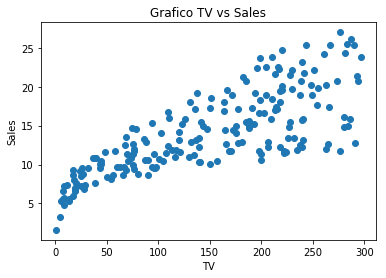

In [69]:
pearson_corrn(df_corrn, 'TV', 'Sales')

0.576222574571055

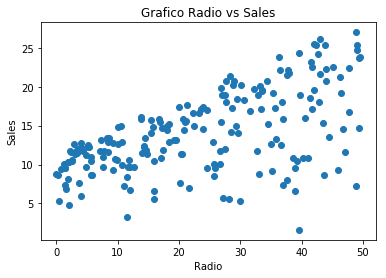

In [70]:
pearson_corrn(df_corrn, 'Radio', 'Sales')

0.22829902637616534

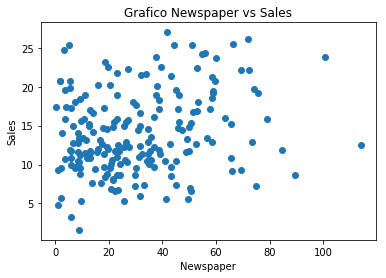

In [71]:
pearson_corrn(df_corrn, 'Newspaper', 'Sales')

## Usando pandas para calcular  el coeficiente de correlacion de Pearson

In [74]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [99]:
np.random.random((4,4))

array([[0.12818241, 0.34494132, 0.62275964, 0.87248084],
       [0.58954456, 0.93916137, 0.67579307, 0.59881433],
       [0.03018357, 0.6045005 , 0.17163461, 0.99981174],
       [0.59888868, 0.24879841, 0.45269124, 0.49212035]])

In [98]:
data = data_ads.corr()
data.shape

np.array(data)

array([[1.        , 0.05480866, 0.05664787, 0.78222442],
       [0.05480866, 1.        , 0.35410375, 0.57622257],
       [0.05664787, 0.35410375, 1.        , 0.22829903],
       [0.78222442, 0.57622257, 0.22829903, 1.        ]])

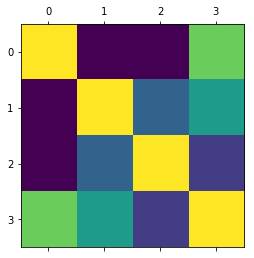

In [76]:
plt.matshow(data_ads.corr())

In [118]:
alpha = data_ads.columns.values

alpha

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

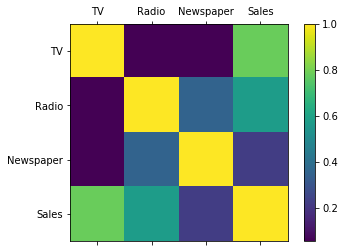

In [120]:
alpha =['TV', 'Radio', 'Newspaper', 'Sales']

data = np.array(data_ads.corr())

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()

In [121]:
data_ads.size

800

In [122]:
data_ads.shape

(200, 4)

In [152]:
n = data_ads.shape[0]
sxy =  np.sum(data_ads['TV']*data_ads['Sales'])

In [153]:
x2 = data_ads['TV']**2

In [154]:
y2 = data_ads['Sales']**2

In [155]:
sx = np.sum(data_ads['TV'])

In [156]:
sy = np.sum(data_ads['Sales'])

In [157]:
sx2 = sx**2

In [158]:
sy2 = sy**2

In [160]:
n*sxy - sx*sy

13945529.75

In [161]:
sumx2 = np.sum(x2)
sumy2 = np.sum(y2)

In [162]:
sqrt1 = np.sqrt(n*sumx2-sx2 )

In [163]:
sqrt2 = np.sqrt(n*sumy2-sy2)

In [164]:
sqrttotal = sqrt1*sqrt2

In [165]:
13945529.75/ sqrttotal

0.7822244248616064